In [1]:
# fill nan inclinations, Omega, argp with random selections
# need to do a disk integration since there isn't a single path that light takes
#    - need to account for angles spanning the visible portion of the illuminated hemisphere

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import EPPE_Simulator as eppe
import astropy.constants as const

In [3]:
systems = eppe.Systems(load=False, nPlanets=2)
mission = eppe.EPPE()
fp, fstar, noise = mission.observe_photometric(systems, 1)

/home/taylor/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:3018: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=10.0, right=10.0
  self.set_xlim(upper, lower, auto=None)


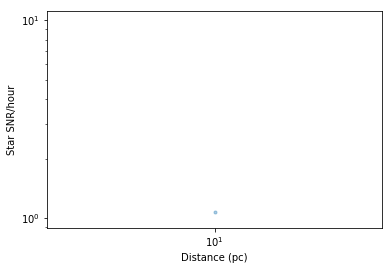

In [4]:
plt.loglog(systems.catalogue['dist']/const.pc.value, fstar/noise, '.', alpha=0.2)
plt.ylabel('Star SNR/hour')
plt.xlabel('Distance (pc)')
plt.show()

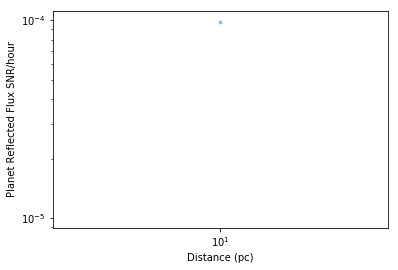

In [5]:
plt.loglog(systems.catalogue['dist']/const.pc.value, fp/noise, '.', alpha=0.2)
plt.ylabel('Planet Reflected Flux SNR/hour')
plt.xlabel('Distance (pc)')
plt.show()

In [6]:
stokesCurves = mission.observe_polarization(systems, 1)

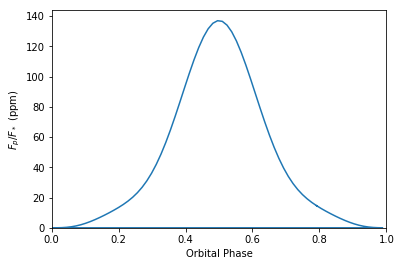

In [7]:
plt.plot(stokesCurves[0][-1], (stokesCurves[0][0]/fstar[0]-1)*1e6)
plt.ylabel(r'$F_p/F_*$ (ppm)')
plt.xlabel('Orbital Phase')
plt.xlim(0,1)
plt.ylim(0)
plt.show()

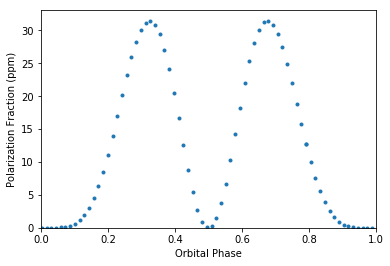

In [8]:
plt.plot(stokesCurves[0][-1], np.sqrt(stokesCurves[0][1]**2, stokesCurves[0][2]**2)/stokesCurves[0][0]*1e6, '.')
plt.ylabel('Polarization Fraction (ppm)')
plt.xlabel('Orbital Phase')
plt.xlim(0,1)
plt.ylim(0)
plt.show()